Aplikasi Peningkatan Kualitas Citra Berwarna
Silakan unggah gambar:


Saving rumput (1).jpg to rumput (1).jpg


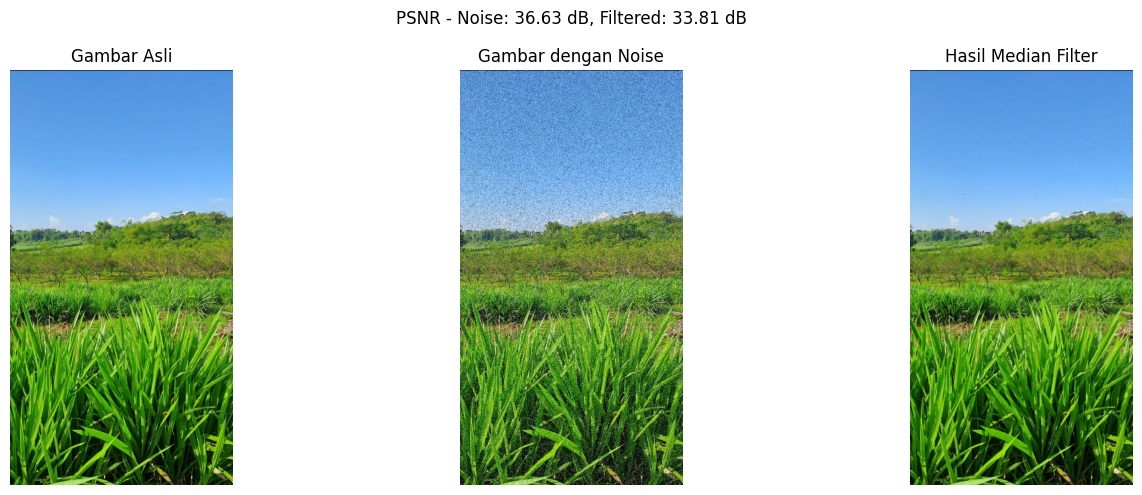

Gambar hasil telah disimpan sebagai 'noisy_rumput (1).jpg' dan 'filtered_rumput (1).jpg'


In [ ]:
# Import library yang diperlukan
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import os

def add_noise(image, noise_type='salt_pepper', amount=0.05):
    """
    Fungsi untuk menambahkan noise pada gambar
    """
    noisy_image = np.copy(image)

    if noise_type == "salt_pepper":
        # Salt and pepper noise
        s_vs_p = 0.5
        # Salt (nilai 255) noise
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

        # Untuk gambar berwarna, mengatur semua channel ke 255
        if len(image.shape) == 3:
            for i in range(len(coords[0])):
                x = coords[0][i]
                y = coords[1][i]
                if x < image.shape[0] and y < image.shape[1]:
                    noisy_image[x, y, :] = 255

        # Pepper (nilai 0) noise
        num_pepper = np.ceil(amount * image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

        # Untuk gambar berwarna, mengatur semua channel ke 0
        if len(image.shape) == 3:
            for i in range(len(coords[0])):
                x = coords[0][i]
                y = coords[1][i]
                if x < image.shape[0] and y < image.shape[1]:
                    noisy_image[x, y, :] = 0

    return noisy_image.astype(np.uint8) #atur gambar 8-bit per channel pada piksel 0-255

def apply_median_filter(image, kernel_size=3): #semakin tinggi kernel size maka semakin tinggi mengaburkan gambar
    """
    Fungsi untuk menerapkan median filter pada gambar
    """
    return cv2.medianBlur(image, kernel_size)

def calculate_psnr(original, processed):
    """
    Menghitung Peak Signal-to-Noise Ratio (PSNR)
    """
    mse = np.mean((original - processed) ** 2) # semakin tinggi nilai PSNR maka semakin mirip gambar hasil dengan aslinya #menghitung mse terlebih dahulu kemudian digunakan untuk menghitung PSNR
    if mse == 0: #mse perhitungan rata2 kesalahan antara gambar asli dan gambar hasil proses
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

def process_image(input_image, noise_amount=0.05, kernel_size=3):
    """
    Fungsi utama untuk memproses gambar
    """
    # Konversi dari BGR ke RGB (karena OpenCV menggunakan BGR)
    original_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Tambahkan noise
    noisy_image = add_noise(original_image, amount=noise_amount)

    # Terapkan median filter
    filtered_image = apply_median_filter(noisy_image, kernel_size)

    return original_image, noisy_image, filtered_image

def show_results(original, noisy, filtered):
    """
    Menampilkan hasil pemrosesan gambar
    """
    # Buat subplot untuk menampilkan 3 gambar
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Tampilkan gambar
    axs[0].imshow(original)
    axs[0].set_title('Gambar Asli')
    axs[0].axis('off')

    axs[1].imshow(noisy)
    axs[1].set_title('Gambar dengan Noise')
    axs[1].axis('off')

    axs[2].imshow(filtered)
    axs[2].set_title('Hasil Median Filter')
    axs[2].axis('off')

    # Hitung PSNR
    psnr_noisy = calculate_psnr(original, noisy)
    psnr_filtered = calculate_psnr(original, filtered)

    plt.suptitle(f'PSNR - Noise: {psnr_noisy:.2f} dB, Filtered: {psnr_filtered:.2f} dB') #decibel: satuan pd PSNR
    plt.tight_layout()
    plt.show()

def main():
    """
    Fungsi utama program
    """
    print("Aplikasi Peningkatan Kualitas Citra Berwarna")
    print("============================================")

    # Unggah gambar
    print("Silakan unggah gambar:")
    uploaded = files.upload()

    if not uploaded:
        print("Tidak ada file yang diunggah!")
        return

    # Ambil file pertama yang diunggah
    file_name = list(uploaded.keys())[0]

    # Baca gambar
    image = cv2.imread(file_name)
    if image is None:
        print(f"Tidak dapat membaca gambar: {file_name}")
        return

    # Parameter pemrosesan
    noise_amount = 0.05  # Default noise amount
    kernel_size = 3      # Default kernel size

    # Proses gambar
    original, noisy, filtered = process_image(image, noise_amount, kernel_size)

    # Tampilkan hasil
    show_results(original, noisy, filtered)

    # Simpan gambar hasil
    cv2.imwrite(f"noisy_{file_name}", cv2.cvtColor(noisy, cv2.COLOR_RGB2BGR)) # jika PSNR > 30 maka gambar bisa dibilang mirip dengan gambar aslinya
    cv2.imwrite(f"filtered_{file_name}", cv2.cvtColor(filtered, cv2.COLOR_RGB2BGR)) # jika PSNR filtered sedikit lebih rendah dari noise maka median filter berhasil diterapkan
    print(f"Gambar hasil telah disimpan sebagai 'noisy_{file_name}' dan 'filtered_{file_name}'") # dan median filter berhasil untuk mengurangi noise

# Jalankan program
if __name__ == "__main__":
    main()